In [64]:
import cv2
import os
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
from skimage import segmentation

In [65]:
root_dir = '_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/'
mat_file = '_LABELLED_SAMPLES/CARDS_COURTYARD_B_T/polygons.mat'

In [66]:
jpeg_files = sorted([x for x in os.listdir(root_dir) if '.jpg' in x])

In [67]:
len(jpeg_files)

100

In [68]:
mat = scipy.io.loadmat(mat_file)

In [69]:
polygons = mat['polygons']
left_right = ['myleft', 'myight', 'yourleft', 'yourright']

In [70]:
polygons[0][0][3]

array([[526.3556701 , 449.57216495],
       [526.3556701 , 454.85051546],
       [525.03608247, 462.76804124],
       [521.07731959, 472.00515464],
       [519.75773196, 475.96391753],
       [519.75773196, 478.60309278],
       [519.75773196, 481.24226804],
       [518.43814433, 487.84020619],
       [518.43814433, 490.47938144],
       [517.1185567 , 494.43814433],
       [515.79896907, 495.75773196],
       [517.1185567 , 502.3556701 ],
       [517.1185567 , 506.31443299],
       [518.43814433, 511.59278351],
       [518.43814433, 514.23195876],
       [519.75773196, 518.19072165],
       [521.07731959, 519.51030928],
       [523.71649485, 522.14948454],
       [526.3556701 , 524.78865979],
       [530.31443299, 528.74742268],
       [531.63402062, 530.06701031],
       [534.27319588, 531.38659794],
       [540.87113402, 535.34536082],
       [546.14948454, 536.66494845],
       [550.10824742, 537.98453608],
       [554.06701031, 539.30412371],
       [556.70618557, 540.62371134],
 

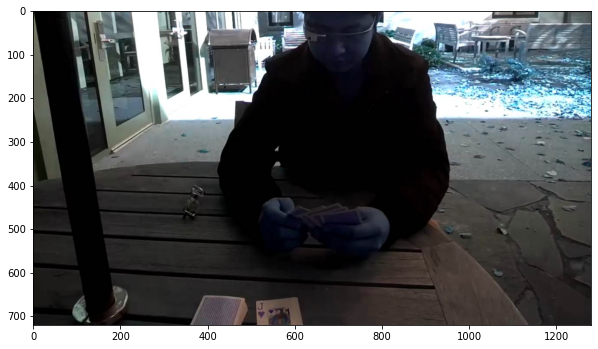

In [71]:
jpeg_file_path = os.path.join(root_dir, jpeg_files[0])
img = cv2.imread(jpeg_file_path)
plt.figure(figsize=[10, 10])
plt.imshow(img)

In [87]:
coordinates_left = [(x[0], x[1]) for x in polygons[0][0][2]]
coordinates_right = [(x[0], x[1]) for x in polygons[0][0][3]]

In [89]:
img_new_left = Image.new('L', (img.shape[1], img.shape[0]), 0)
ImageDraw.Draw(img_new_left).polygon(coordinates_left, outline=1, fill=1)
mask_left = np.array(img_new_left)

img_new_right = Image.new('L', (img.shape[1], img.shape[0]), 0)
ImageDraw.Draw(img_new_right).polygon(coordinates_right, outline=1, fill=1)
mask_right = np.array(img_new_right)

mask = mask_left | mask_right

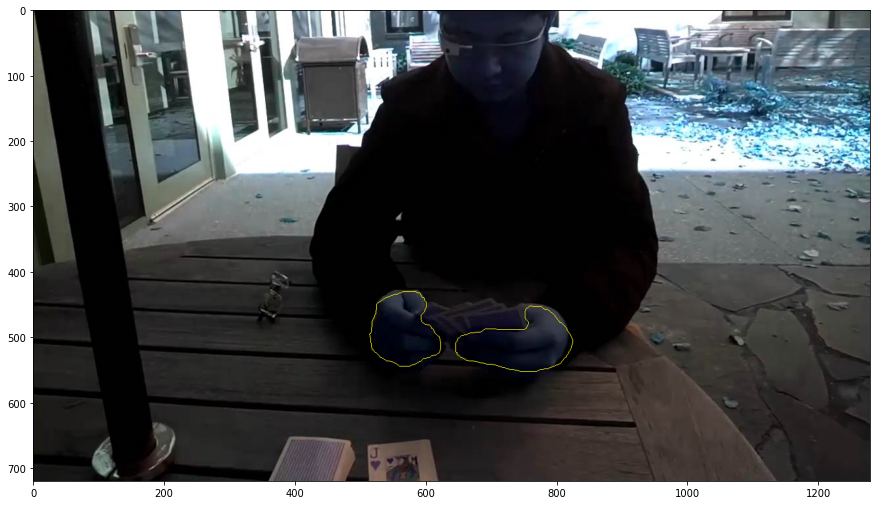

In [90]:
plt.figure(figsize=[15, 15])
plt.imshow(segmentation.mark_boundaries(img, mask))